# Mushroom classification

## Main objective of the analysis

In this projct we aim to infer if a certain mushroom given some detailed characteristics is poisonous or not. More specifically, 2 Neural Nets and a clustering method are applied.

Data has been downloades from Kaggle : https://www.kaggle.com/uciml/mushroom-classification

## Brief summary of data you chose and data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"

In [2]:
filepath = 'mushrooms.csv'
data = pd.read_csv(filepath)

The mushroom database has the following features, where each labels i respectively explained.

#### About this file Attribute Information: 
(classes: **edible=e**, **poisonous=p**)

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

- bruises: bruises=t,no=f

- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

- gill-attachment: attached=a,descending=d,free=f,notched=n

- gill-spacing: close=c,crowded=w,distant=d

- gill-size: broad=b,narrow=n

- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

- stalk-shape: enlarging=e,tapering=t

- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- veil-type: partial=p,universal=u

- veil-color: brown=n,orange=o,white=w,yellow=y

- ring-number: none=n,one=o,two=t

- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

Using the info function we check that all features are objects.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

The output we are trying to predict is **class**,which can be **edible = e** or **poison = p**. We observe thet both are more or less equally distributed.

In [4]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Instead of plotting a pairplot (since we have 22 features and it would be difficult to observe and interpret), the distribution plots for all features are represented, for which the corresponding class is differentiated.

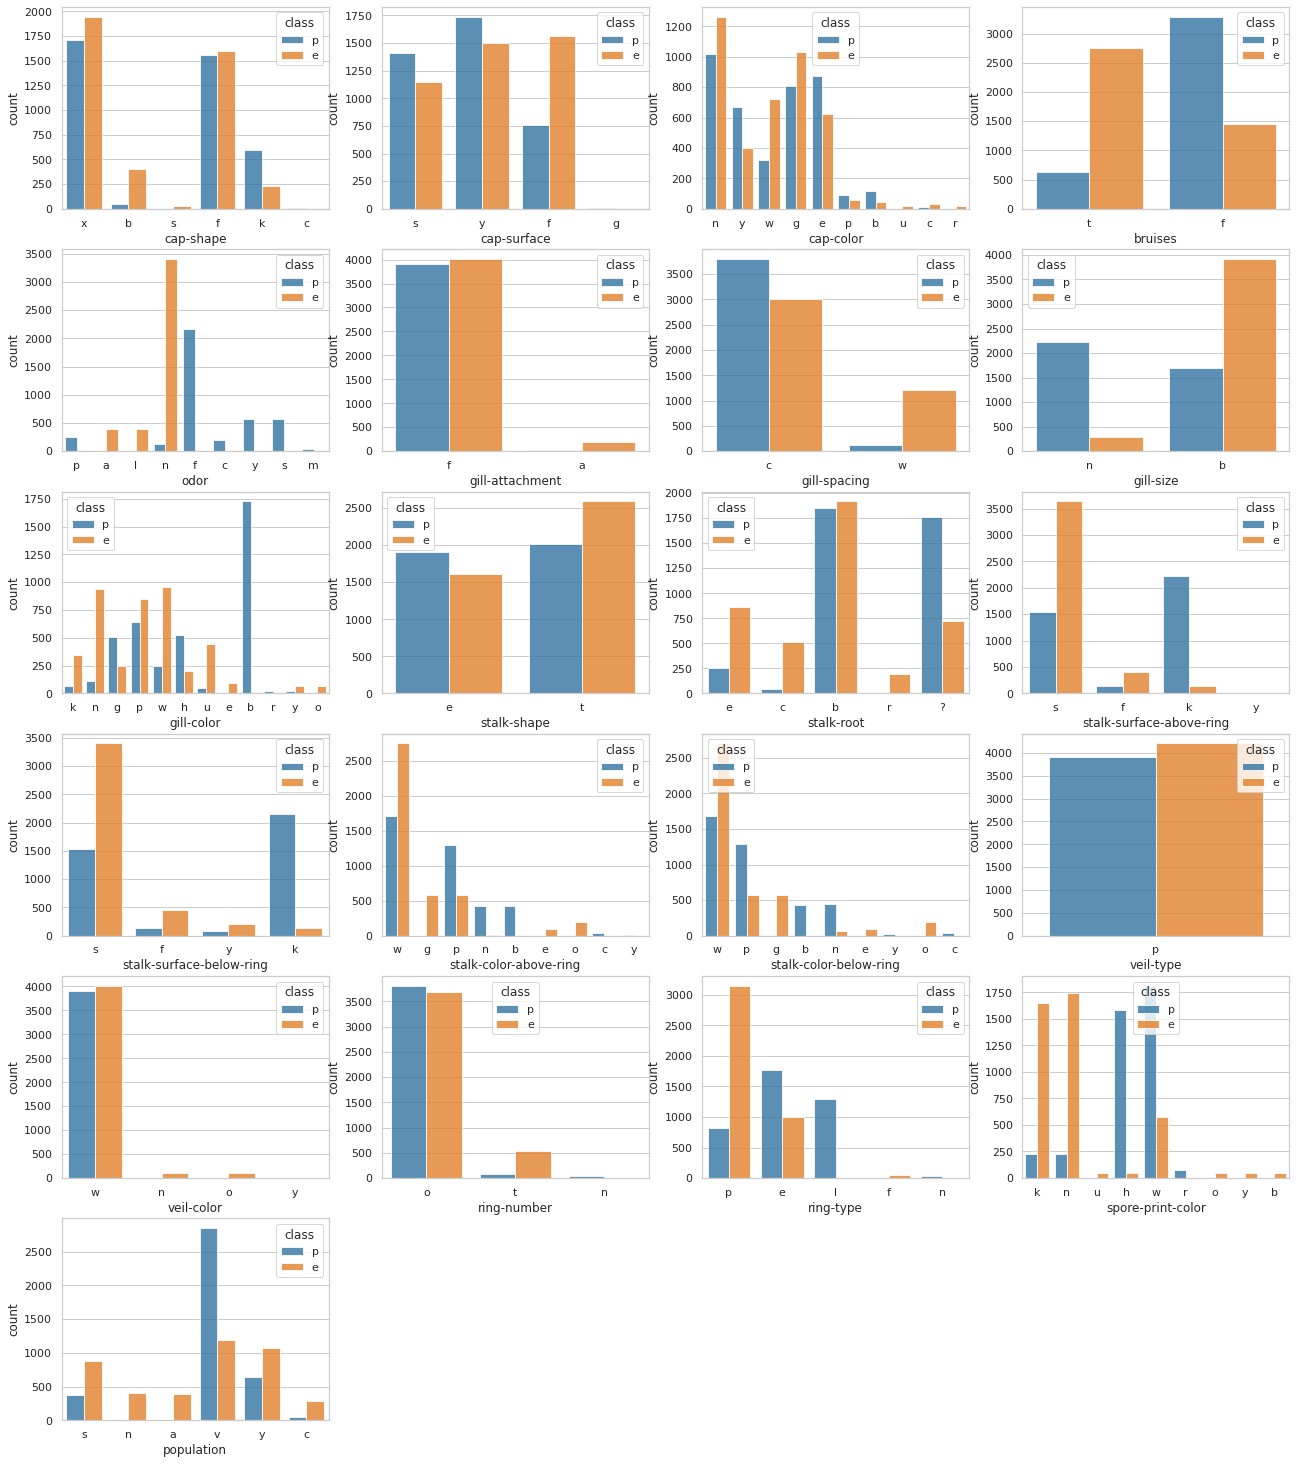

In [5]:
import seaborn as sns

sns.set_context('notebook')
sns.set_style("whitegrid")

fig = plt.figure(figsize=(22,26))

for i in range(1,len(data.columns)-1):
    plt.subplot(6,4, i)
    sns.countplot(data = data, x = data.columns[i], hue = 'class', alpha = 0.8)
plt.show()

From the last plot we observe that features such as **odor** whould have most of the data explainability, since some subclasses only correspond to one single class of **poison** or **edible**. For others this feature is more randomly distributed.

I suppose that before starting to analyse, we could redure de data dimensionality by applying **PCA**, but, since the calculations do not last too much it is left this way for the moment.

Now let's first encode our measurements.

In [6]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
le = LabelEncoder()

features = []
for i in data.columns:
    features.append(i)

X_le = pd.DataFrame()

for i in range(len(features)):
    X_le[i] = le.fit_transform(data.iloc[:,i])

X_le.columns = features
X_le.head().T

,0,1,2,3,4
class,1,0,0,1,0
cap-shape,5,5,0,5,5
cap-surface,2,2,2,3,2
cap-color,4,9,8,8,3
bruises,1,1,1,1,0
odor,6,0,3,6,5
gill-attachment,1,1,1,1,1
gill-spacing,0,0,0,0,1
gill-size,1,0,0,1,0
gill-color,4,4,5,5,4


Once this is done, we segregate the data for train and test sets and reescale it.

In [7]:
X = X_le.iloc[:,1:]  # features
y = X_le['class'] # outputs

In [8]:
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.25, random_state = 1234)

In [9]:
# standarization.
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

## Summary of training at least three variations of the Deep Learning model

## Neural net with one layer

We will first apply a Neural Net with only one layer. We define a first layer with 12 nodes, and then the output node. All nodes have the **sigmoid** activation function.

In [10]:
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

model_1 = Sequential()

# Firt Layer
model_1.add(Dense(12, input_shape = (22,), activation = 'sigmoid'))

# Output node
model_1.add(Dense(1, activation = 'sigmoid'))

In [11]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                276       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


We will train the model first with $\text{epochs} = 50$

In [11]:
# Now let's fit and triain the model
model_1.compile(SGD(lr = 0.003), 'binary_crossentropy', metrics=['accuracy'])

run_hist_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
191/191 [==============================] - 1s 4ms/step - loss: 0.7701 - accuracy: 0.5237 - val_loss: 0.7304 - val_accuracy: 0.5007
Epoch 2/50
191/191 [==============================] - 0s 2ms/step - loss: 0.7028 - accuracy: 0.5460 - val_loss: 0.6934 - val_accuracy: 0.5721
Epoch 3/50
191/191 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.6361 - val_loss: 0.6712 - val_accuracy: 0.6982
Epoch 4/50
191/191 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.7180 - val_loss: 0.6528 - val_accuracy: 0.7203
Epoch 5/50
191/191 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.7292 - val_loss: 0.6356 - val_accuracy: 0.7238
Epoch 6/50
191/191 [==============================] - 1s 3ms/step - loss: 0.6267 - accuracy: 0.7326 - val_loss: 0.6197 - val_accuracy: 0.7253
Epoch 7/50
191/191 [==============================] - 0s 2ms/step - loss: 0.6116 - accuracy: 0.7400 - val_loss: 0.6046 - val_accuracy: 0.7351
Epoch 

In [12]:
# Now we get the predictions
y_pred_class_nn_1 = model_1.predict_classes(X_test)
y_pred_prob_nn_1 = model_1.predict(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Now er print the accuracy of the model:

In [13]:
# Print model performance and plot the roc curve
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score


print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

accuracy is 0.866
roc-auc is 0.914


Finally, we plot the **ROC** curve to obervse the goodness of the model.

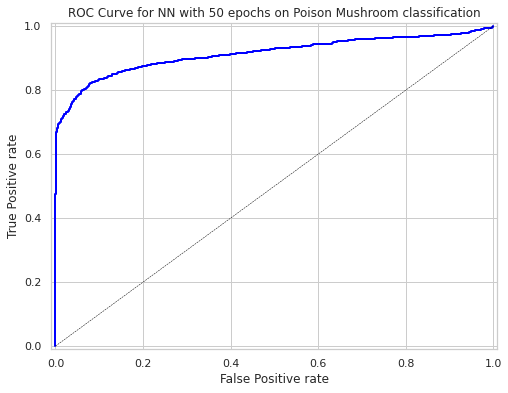

In [14]:
#Farem el plot, aquesta és una funció que ens farà la ROC curve cada cop

def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(fpr, tpr, 'k-', color = 'blue', linewidth=2)
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on Poison Mushroom classification'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01], xlabel = 'False Positive rate', ylabel = 'True Positive rate')
    
    
plot_roc(y_test, y_pred_prob_nn_1, 'NN with 50 epochs')

Even that the goodnes of the model is already very high, let's observe what happens if we ask for more epochs, more precisely $\text{epochs} = 150$.

In [15]:
run_hist_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150)

Epoch 1/150
191/191 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8766 - val_loss: 0.3514 - val_accuracy: 0.8671
Epoch 2/150
191/191 [==============================] - 0s 2ms/step - loss: 0.3378 - accuracy: 0.8782 - val_loss: 0.3491 - val_accuracy: 0.8676
Epoch 3/150
191/191 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.8790 - val_loss: 0.3472 - val_accuracy: 0.8690
Epoch 4/150
191/191 [==============================] - 1s 3ms/step - loss: 0.3331 - accuracy: 0.8799 - val_loss: 0.3450 - val_accuracy: 0.8700
Epoch 5/150
191/191 [==============================] - 0s 2ms/step - loss: 0.3309 - accuracy: 0.8800 - val_loss: 0.3429 - val_accuracy: 0.8710
Epoch 6/150
191/191 [==============================] - 0s 3ms/step - loss: 0.3287 - accuracy: 0.8808 - val_loss: 0.3409 - val_accuracy: 0.8715
Epoch 7/150
191/191 [==============================] - 1s 3ms/step - loss: 0.3266 - accuracy: 0.8815 - val_loss: 0.3389 - val_accuracy: 0.8730

Epoch 58/150
191/191 [==============================] - 1s 4ms/step - loss: 0.2604 - accuracy: 0.9101 - val_loss: 0.2762 - val_accuracy: 0.9060
Epoch 59/150
191/191 [==============================] - 0s 2ms/step - loss: 0.2595 - accuracy: 0.9109 - val_loss: 0.2755 - val_accuracy: 0.9055
Epoch 60/150
191/191 [==============================] - 1s 3ms/step - loss: 0.2586 - accuracy: 0.9107 - val_loss: 0.2743 - val_accuracy: 0.9079
Epoch 61/150
191/191 [==============================] - 0s 2ms/step - loss: 0.2575 - accuracy: 0.9114 - val_loss: 0.2732 - val_accuracy: 0.9094
Epoch 62/150
191/191 [==============================] - 0s 2ms/step - loss: 0.2566 - accuracy: 0.9119 - val_loss: 0.2722 - val_accuracy: 0.9094
Epoch 63/150
191/191 [==============================] - 0s 2ms/step - loss: 0.2557 - accuracy: 0.9119 - val_loss: 0.2713 - val_accuracy: 0.9089
Epoch 64/150
191/191 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.9125 - val_loss: 0.2704 - val_accuracy:

Epoch 115/150
191/191 [==============================] - 1s 3ms/step - loss: 0.2094 - accuracy: 0.9281 - val_loss: 0.2244 - val_accuracy: 0.9222
Epoch 116/150
191/191 [==============================] - 1s 3ms/step - loss: 0.2086 - accuracy: 0.9283 - val_loss: 0.2234 - val_accuracy: 0.9232
Epoch 117/150
191/191 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 0.9280 - val_loss: 0.2228 - val_accuracy: 0.9222
Epoch 118/150
191/191 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9286 - val_loss: 0.2218 - val_accuracy: 0.9232
Epoch 119/150
191/191 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9289 - val_loss: 0.2207 - val_accuracy: 0.9227
Epoch 120/150
191/191 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9288 - val_loss: 0.2197 - val_accuracy: 0.9227
Epoch 121/150
191/191 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9296 - val_loss: 0.2189 - val_ac

In [16]:
# Now we get the predictions
y_pred_class_nn_1 = model_1.predict_classes(X_test)
y_pred_prob_nn_1 = model_1.predict(X_test)

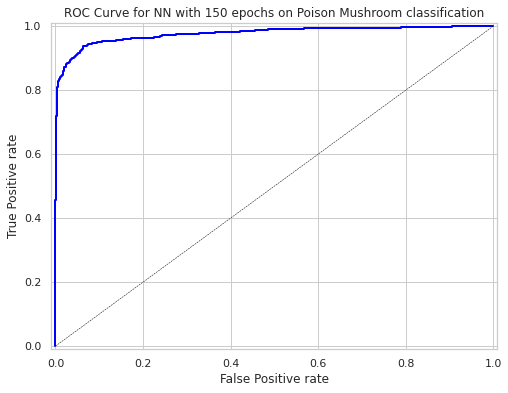

In [17]:
plot_roc(y_test, y_pred_prob_nn_1, 'NN with 150 epochs')

Accuracy and the goodnes of the model improves, but it has more computational cost.

## Model with 2 hidden layers

Let's oberve what happens with 2 hidden layers instead of only one. In this case we define an extra layer with 6 nodes.

In [18]:
model_2 = Sequential()
model_2.add(Dense(12, input_shape=(22,), activation="relu"))
model_2.add(Dense(6,  activation="relu"))
model_2.add(Dense(1, activation="sigmoid"))

model_2.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])

run_hist_2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
191/191 [==============================] - 1s 3ms/step - loss: 0.6323 - accuracy: 0.6532 - val_loss: 0.5679 - val_accuracy: 0.7184
Epoch 2/50
191/191 [==============================] - 0s 2ms/step - loss: 0.5500 - accuracy: 0.7152 - val_loss: 0.5245 - val_accuracy: 0.7326
Epoch 3/50
191/191 [==============================] - 0s 3ms/step - loss: 0.5167 - accuracy: 0.7427 - val_loss: 0.4988 - val_accuracy: 0.7528
Epoch 4/50
191/191 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.7605 - val_loss: 0.4788 - val_accuracy: 0.7671
Epoch 5/50
191/191 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.7707 - val_loss: 0.4602 - val_accuracy: 0.7774
Epoch 6/50
191/191 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.7820 - val_loss: 0.4405 - val_accuracy: 0.7888
Epoch 7/50
191/191 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.7904 - val_loss: 0.4210 - val_accuracy: 0.7986
Epoch 

In [19]:
y_pred_class_nn_2 = model_2.predict_classes(X_test)
y_pred_prob_nn_2 = model_2.predict(X_test)

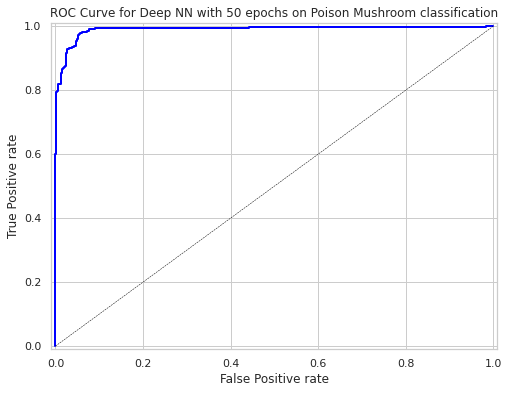

In [20]:
plot_roc(y_test, y_pred_prob_nn_2, 'Deep NN with 50 epochs')

The goodness of the model is more or less equal than the one with only one layer but with 150 epochs, and the computational cost is more or less the same.

Now let's plot the evolution of accuracy and the loss function through iterations.

Text(0.5, 1.0, 'Accuracy over iterations')

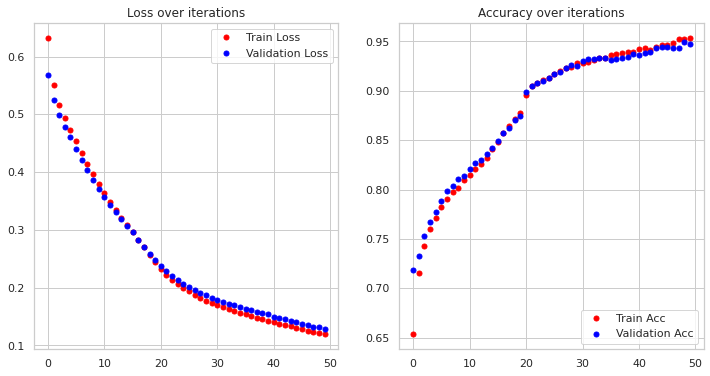

In [21]:
n = len(run_hist_2.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist_2.history["loss"]),'r.', label="Train Loss", markersize=10)
ax.plot(range(n), (run_hist_2.history["val_loss"]),'b.', label="Validation Loss", markersize=10)
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist_2.history["accuracy"]),'r.', label="Train Acc", markersize=10)
ax.plot(range(n), (run_hist_2.history["val_accuracy"]),'b.', label="Validation Acc", markersize=10)
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

Let's oberve if we can improve the model with more epochs (150)

In [22]:
run_hist_2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150)

Epoch 1/150
191/191 [==============================] - 1s 3ms/step - loss: 0.1169 - accuracy: 0.9539 - val_loss: 0.1257 - val_accuracy: 0.9498
Epoch 2/150
191/191 [==============================] - 1s 3ms/step - loss: 0.1154 - accuracy: 0.9563 - val_loss: 0.1237 - val_accuracy: 0.9508
Epoch 3/150
191/191 [==============================] - 1s 3ms/step - loss: 0.1133 - accuracy: 0.9581 - val_loss: 0.1221 - val_accuracy: 0.9527
Epoch 4/150
191/191 [==============================] - 0s 3ms/step - loss: 0.1119 - accuracy: 0.9596 - val_loss: 0.1200 - val_accuracy: 0.9503
Epoch 5/150
191/191 [==============================] - 0s 2ms/step - loss: 0.1100 - accuracy: 0.9578 - val_loss: 0.1185 - val_accuracy: 0.9513
Epoch 6/150
191/191 [==============================] - 0s 2ms/step - loss: 0.1082 - accuracy: 0.9595 - val_loss: 0.1166 - val_accuracy: 0.9532
Epoch 7/150
191/191 [==============================] - 1s 3ms/step - loss: 0.1070 - accuracy: 0.9611 - val_loss: 0.1153 - val_accuracy: 0.9562

Epoch 58/150
191/191 [==============================] - 1s 3ms/step - loss: 0.0666 - accuracy: 0.9865 - val_loss: 0.0728 - val_accuracy: 0.9808
Epoch 59/150
191/191 [==============================] - 0s 2ms/step - loss: 0.0664 - accuracy: 0.9865 - val_loss: 0.0728 - val_accuracy: 0.9808
Epoch 60/150
191/191 [==============================] - 1s 4ms/step - loss: 0.0662 - accuracy: 0.9862 - val_loss: 0.0721 - val_accuracy: 0.9852
Epoch 61/150
191/191 [==============================] - 0s 2ms/step - loss: 0.0654 - accuracy: 0.9864 - val_loss: 0.0724 - val_accuracy: 0.9823
Epoch 62/150
191/191 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9857 - val_loss: 0.0707 - val_accuracy: 0.9828
Epoch 63/150
191/191 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.9865 - val_loss: 0.0703 - val_accuracy: 0.9847
Epoch 64/150
191/191 [==============================] - 1s 3ms/step - loss: 0.0643 - accuracy: 0.9870 - val_loss: 0.0702 - val_accuracy:

191/191 [==============================] - 0s 2ms/step - loss: 0.0523 - accuracy: 0.9905 - val_loss: 0.0569 - val_accuracy: 0.9882
Epoch 115/150
191/191 [==============================] - 0s 2ms/step - loss: 0.0522 - accuracy: 0.9906 - val_loss: 0.0585 - val_accuracy: 0.9867
Epoch 116/150
191/191 [==============================] - 1s 3ms/step - loss: 0.0520 - accuracy: 0.9910 - val_loss: 0.0572 - val_accuracy: 0.9897
Epoch 117/150
191/191 [==============================] - 1s 3ms/step - loss: 0.0517 - accuracy: 0.9918 - val_loss: 0.0597 - val_accuracy: 0.9852
Epoch 118/150
191/191 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9900 - val_loss: 0.0567 - val_accuracy: 0.9892
Epoch 119/150
191/191 [==============================] - 0s 3ms/step - loss: 0.0512 - accuracy: 0.9910 - val_loss: 0.0569 - val_accuracy: 0.9902
Epoch 120/150
191/191 [==============================] - 0s 3ms/step - loss: 0.0511 - accuracy: 0.9915 - val_loss: 0.0579 - val_accuracy: 0.9877

Text(0.5, 1.0, 'Accuracy over iterations')

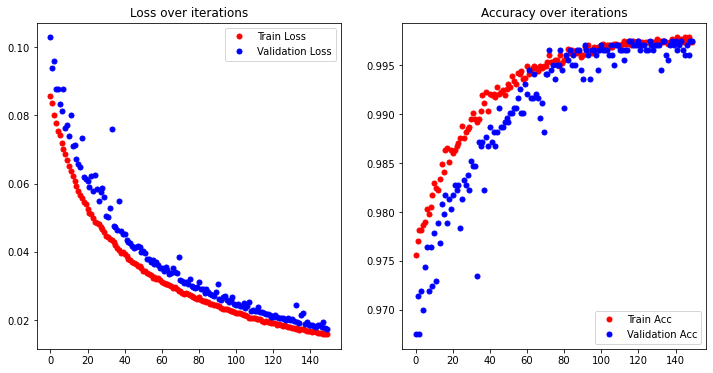

In [24]:
n = len(run_hist_2.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist_2.history["loss"]),'r.', label="Train Loss", markersize=10)
ax.plot(range(n), (run_hist_2.history["val_loss"]),'b.', label="Validation Loss", markersize=10)
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist_2.history["accuracy"]),'r.', label="Train Acc", markersize=10)
ax.plot(range(n), (run_hist_2.history["val_accuracy"]),'b.', label="Validation Acc", markersize=10)
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

In here we can observe how the accuracy converged. Nonetheless, it takes quie a time tu run this model. Let's see what happens with other machine learning algorithms such as KMeans.

## KNN classifier

In this section we will apply the **KNN** classifier. We will also compute the accuracy and compare with the last models.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

knn = KNeighborsClassifier(n_neighbors=2)

knn = knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))

Accuracy score:  0.9985
F1 Score:  0.9985


We observe how the accuracy reaches values of 0.99 and faster than the neural nets models.

Text(0.5, 30.5, 'Ground Truth')

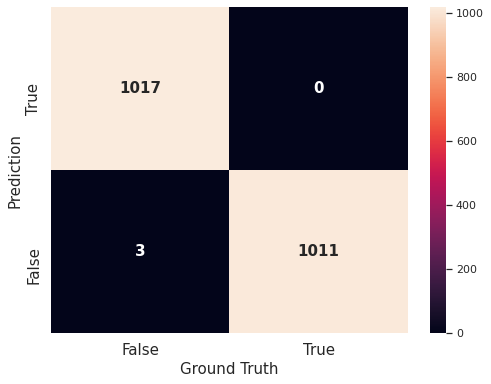

In [24]:
import seaborn as sns
ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 15, "weight": "bold"})

labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=15)
ax.set_yticklabels(labels[::-1], fontsize=15)
ax.set_ylabel('Prediction', fontsize=15);
ax.set_xlabel('Ground Truth', fontsize=15)

## Which is the best model?

In this specifica case, we can affirm that the neural nets are not the best option to choose. The classification problem with **KNN** reaches higher values of accuracy very fast, and al NN models take higher time to reach smaller value sof accurary. Maybe, we could have applies **PCA** before NN, and the time requieres would have been less.